# SailGP Data Analyst Challenge

The aim is to test you python abilities. The challenge is to analyze the data provided and answer the questions below. You can use any library you want to help you with the analysis. The data is from the SailGP event in Auckland 2025. The data is in the 'DATA' folder.

There are various sources available.

The Boat Logs are in the 'Boat_Logs' folder. The data is in csv format and the columns are described in the 'Boat_Logs/Boat_Logs_Columns.csv' file.
The 'Course_Marks_2025-01-19.csv' file contains the mark positions and wind reading on the course for the whole day.

The Race_XML folder contains the xml files for each race that contains information on where the boundaries of the course are, the theoretical position of the marks and the target racecourse axis.

The 2025-01-19_man_summary.csv file contains the metrics from the manoeuvre summary for the day.
The 2025-01-19_straight_lines.csv file contains the metrics from the straight line summary for the day.

Both are derived from the boat logs.

The 2502 m8_APW_HSB2_HSRW.kph.csv file contains the polar data for the boats in that config.

## Requierements
- Chose at least 3 questions from the list below to answer.
- Python 3.8 or higher
- Notebook should be able to run without any errors from start to finish.
- Specify the libraries (imports) used in the notebook.
- Any comments to make the notebook self-explanatory and easy to follow would be appreciated.
- If you can't get to the end of a question, we would appreciate the code you have written so far and explain what you were trying to do.

## Further information:
- We usually use bokeh for visualizations. So any showcase of bokeh would be appreciated.

## Submitting the results.
It would be great if you could provide a jupyter notebook with the code and the results of the analysis. You can submit the results by sharing a link to a git repository.


<h3 align="center"># SailGP Data Analyst Challenge</h3>

Visit my Profile again at https://kairichardkoenig.de/about/projects/

## 🤔 Choices

There are considerate choice I made while building this application.

### `ruff` for killing style discussions

I choose and `ruff` to enforce a consistent style across the project. `ruff` is a tool that checks the python code for correctness. 
I have configured it to fail the build if it detects any issues. This way I can focus on the actual code instead of thinking about style. 
However the tools are only needed for development.

### `Makefile` for Automation

I have added a `Makefile` to help with repeated tasks and basic interaction with the project. It contains all the commands needed to setup and run the project and its tests.

### Cursor AI as Editor 

Makes a huge difference when working with Code and data. I included a few checkpoints in `llm-checkpoints` so you can see how I work with LLMs.
Some of the more advanced geospatial math stuff came from Claude AI, as well as the feature analysis part. 
Because these are areas I lack expertise in. 

### Data Analysis & Processing
- **pandas & numpy**: Core data manipulation libraries for efficient handling of large datasets
- **scipy & scikit-learn**: For statistical analysis and machine learning capabilities
- **pandera**: Schema validation to ensure data quality and consistency

### Visualization
- **bokeh**: Interactive visualization library, preferred for SailGP analysis
- **matplotlib & seaborn**: Additional plotting capabilities for static visualizations
- **folium**: For geographic data visualization and mapping

### Development Tools
- **ruff**: Modern Python linter for consistent code style and quality
- **jupyter**: Interactive development environment for analysis and documentation
- **ipython & ipywidgets**: Enhanced interactive computing and UI components

### Project Management
- **Makefile**: Automation of common tasks and standardized workflow
- **requirements.txt**: Dependency management and reproducible environment
- **venv**: Python virtual environment for isolated development

These tools were selected to provide a robust, maintainable analysis environment while following SailGP's preferred technologies (like bokeh) and modern Python development practices.

## 🏁 Getting Started

### Prerequisites for Testing and Running the Code

You will need `python >= 3.12` installed for running the python parts of the code. Obviously.

## ⚙️ Setting up and running

☝️ Note: I don't have a Windows machine near me, so the following commands are written in bash and must be translated accordingly.

```bash
# Navigate into the root folder of the project
> cd <>
# install all dependecies and get running
> make jupyter
# Or you want to lint the project simply run 
> make lint
```

## 🧵 Discussion

### Project structure
 
 ```
 src/
 ├── __init__.py            # Package initialization
 ├── analysis/
 │   ├── calibration.py     # Wind calibration analysis and corrections
 │   └── feature_importance.py  # ML feature analysis for maneuver optimization
 ├── importer.py            # Data import utilities for all data sources
 ├── main.py                # Main entry point and orchestration
 ├── models/
 │   ├── dataclasses.py     # Core data structures using Python dataclasses
 │   └── dataframes.py      # Pandera schemas for DataFrame validation
 ├── navigation/
 │   ├── bearing.py         # Bearing and heading calculations
 │   ├── compass.py         # Compass averaging and direction math
 │   ├── course.py          # Course boundary and mark processing
 │   ├── leg_analyzer.py    # Race leg analysis and optimization
 │   └── polar.py           # Polar performance data processing
 ├── race_analysis/
 │   ├── dtl.py             # Distance to Leader calculations
 │   └── leader.py          # Leader detection and position tracking
 ├── transformations/
 │   ├── maneuver_processor.py  # Maneuver detection and analysis
 │   └── tack_transformations.py # Tack-dependent variable transformations
 ├── utils/
 │   └── gps.py             # GPS coordinate transformations and calculations
 └── visualization/
     ├── dtl.py             # Distance to Leader plotting
     ├── racemap.py         # Race course and track visualization
     └── sampling.py        # Time series resampling and visualization
 ```
 
 The src/ directory contains the core functionality organized into modules:
 - analysis/: Advanced analytics for calibration and feature importance
 - models/: Core data structures and validation schemas
 - navigation/: All navigation calculations and course analysis
 - race_analysis/: Race-specific metrics and leader tracking
 - transformations/: Data transformations for maneuvers and tacks
 - utils/: GPS and general utility functions
 - visualization/: Specialized plotting and visualization tools
 - importer.py: Centralized data import functionality
 - main.py: Application entry point and coordination




In [1]:
%pip install -r requirements.txt -q


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Imports and re-used functions
Free section to initialize the notebook with the necessary imports and functions that will be used in the notebook.



In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh.plotting import show

output_notebook()

plt.ioff()
# Set pandas display options for better notebook viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_style("whitegrid")

Loading BokehJS ...

## Question 1: ✅  
Write a Python function that can take a compass direction (ie. TWD or Heading) and calculate an accurate mean value across a downsampled frequency. Eg. If TWD is at 1Hz, give me a 10s average.

In [3]:
from src.navigation.compass import calculate_compass_average
from src.importer import import_boat_log

AUS = import_boat_log('Data/Boat_Logs/data_AUS.csv')

downsampled_twd = calculate_compass_average(
    directions=AUS['TWD_SGP_deg'].values,
    sample_rate=1,
    target_rate=10/100
)
display(downsampled_twd.describe())

count    235.000000
mean      62.522841
std        5.488749
min       42.012993
25%       59.407428
50%       62.283000
75%       65.962995
max       80.666148
dtype: float64

In [4]:
from src.visualization.sampling import plot_averaged_twd_widget
from src.importer import import_boat_log

AUS = import_boat_log("Data/Boat_Logs/data_AUS.csv")

plotable_frame = pd.DataFrame(
    {"DATETIME": AUS["DATETIME"], "DIRECTION": AUS["TWD_SGP_deg"]}
)

# Using Bokeh here. Never used it before.
# What's odd compared the the matplotlib version is that the widget only renders after being change once.
#
# ATTENTION: If chart is not showing - Drag slider
#
plot_averaged_twd_widget(plotable_frame)

interactive(children=(FloatSlider(value=0.1, continuous_update=False, description='Rate (Hz):', max=0.2, min=0…

<function src.visualization.sampling.plot_averaged_twd(target_rate: float, compass_data: pandera.typing.pandas.DataFrame[src.models.dataframes.CompassDataSchema]) -> None>

## Question 2: ✅
Given a course XML and a timeseries of boat Lat/Lon values, calculate a VMC column for the same timeseries

In [5]:
from src.models.dataclasses import Race
from src.navigation.course import add_own_mark_tracking, trim_to_race


boat_data = import_boat_log("Data/Boat_Logs/data_GER.csv")
race = Race.from_xml("Data/Race_XMLs/25011905_03-13-55.xml")

# It looked like the gps points end right before the finish line.
# Thus I cannot relibably determine if a boat has finished the race.
# Only after I implemeted the add_own_mark_tracking function I disocvered TRK_LEG_NUM_unk 🤦.
boat_data = add_own_mark_tracking(boat_data, race.marks)
boat_data = trim_to_race(boat_data, race)

# So for the sake of it let's compare my naive implementation with the data from the boat logs.
# Compare mark transition timing between TRK_LEG_NUM and CURRENT_LEG_NUM
transitions_trk = boat_data[boat_data["TRK_LEG_NUM_unk"].diff() != 0][
    ["DATETIME", "TRK_LEG_NUM_unk"]
]
transitions_calc = boat_data[boat_data["CURRENT_LEG_NUM"].diff() != 0][
    ["DATETIME", "CURRENT_LEG_NUM"]
]

# Calculate time differences between corresponding transitions
print("\nTime differences between corresponding transitions:")
min_marks = min(len(transitions_trk), len(transitions_calc))
for i in range(min_marks):
    time_diff = (
        transitions_trk.iloc[i]["DATETIME"] - transitions_calc.iloc[i]["DATETIME"]
    )
    print(f"Mark {i} -> {i+1}: {time_diff}")


Time differences between corresponding transitions:
Mark 0 -> 1: 0 days 00:00:00
Mark 1 -> 2: 0 days 00:00:50
Mark 2 -> 3: 0 days 00:00:10
Mark 3 -> 4: 0 days 00:00:19
Mark 4 -> 5: 0 days 00:00:13
Mark 5 -> 6: 0 days 00:00:08
Mark 6 -> 7: 0 days 00:00:21
Mark 7 -> 8: 0 days 00:00:06


### Displaying VMC as colored GPS Track
I am a totally visual person when it comes to data. That is why I decided to display the VMC as a colored GPS track.
Including all the features of the Race, including coloring the different marks. 
That was done using Folium and not Bokeh. Although I would like to learn Bokeh I only used it for simple visualizations.


In [6]:
from src.models.dataclasses import Race
from src.navigation.course import (
    add_own_mark_tracking,
    calculate_track_vmc,
    trim_to_race,
)
from src.visualization.racemap import visualize_vmc
from src.importer import import_boat_log


boat_data = import_boat_log("Data/Boat_Logs/data_AUS.csv")
race = Race.from_xml("Data/Race_XMLs/25011905_03-13-55.xml")

# Adding my own mark tracking to the boat data, just for comparison.
boat_data = add_own_mark_tracking(boat_data, race.marks)
boat_data = trim_to_race(boat_data, race)

# Use GPS-based position data.
# Alternatively, we could use readings from the boat instruments (e.g., non-GPS data).
# Also, you can switch between the markings I calculated and those supplied in the boat logs.
position_data = pd.DataFrame(
    {
        "DATETIME": boat_data["DATETIME"],
        "LATITUDE_GPS": boat_data["LATITUDE_GPS_unk"],
        "LONGITUDE_GPS": boat_data["LONGITUDE_GPS_unk"],
        "SPEED": boat_data["GPS_SOG_km_h_1"],
        "HEADING": boat_data["GPS_COG_deg"],
        "CURRENT_LEG_NUM": boat_data["TRK_LEG_NUM_unk"],
    }
)

# Although the question states that there will be a race definition and a simple time series of positions provided,
# I don't think you can calculate the VMC correctly without first determining which mark is next.
# We could also calculate SPEED and HEADING on the fly from the GPS data.
#
#    dt = position_data.index.to_series().diff().dt.total_seconds()
#    dist = haversine_distance_nparray(
#        df['LAT'].shift(),
#        df['LON'].shift(),
#        df['LAT'],
#        df['LON']
#    )
#    SPEED = dist / dt  # meters per second
#
#    HEADING = calculate_bearing_nparray(
#        df['LAT'].shift(),
#        df['LON'].shift(),
#        df['LAT'],
#        df['LON']
#    )
#
# Hope you are still satisfied with the VMC calculation.

vmc_data = calculate_track_vmc(position_data, race.marks)
position_data["VMC_km_h_1"] = vmc_data["VMC_km_h_1"]

# Include a map to visualize the VMC.
# Using Folium here to render the map.
# Could not get it to work with Bokeh.
map, fig = visualize_vmc(position_data, race)
map
display(map)
show(fig)

## Question 3: ❌
Verify and comment on the boats calibration. If possible propose a post-calibrated set of wind numbers and a potential calibration table.

### Remarks:

This computation takes forever because I am doing a lot of unnecessary work.
The general idea was to measure the differences between the boat sensors and the mark sensors when the boats are near the marks.
In my opinion, that approach makes sense since they are at roughly the same height, with the wind sensors seemingly located at the bow of the F50.
Naturally, this leads to discrepancies because TWA/TWS measurements from a stationary sensor compared to a moving object will never match. However, the result might still be useful for calibrating the conversion from AWS to TWS and AWA to TWA.


Writing this out makes me realize that this might not be precisely what you are looking for. Instead, it seems more related to the straight-line CSV.
Now I think I went down the wrong path, but as described, I will leave this code here. It takes 1m30s on an M4 Pro.

In [7]:

from src.analysis.calibration import CalibrationAnalyzer
analyzer = CalibrationAnalyzer()
analyzer.load_data(
        mark_winds_path='Data/Course_Marks_2025-01-19.csv',
        boat_logs_path='Data/Boat_logs/data_AUS.csv'
)
analyzer.analyze_mark_winds()
analyzer.show_mark_analysis()

## Question 4: ✅ 
Given a timeseries of Lat/Lon positions and a course XML, in a Python notebook, calculate a Distance to Leader metric for each boat.

### Remarks: 
Use Bokeh again as it seems doable for this type of visualization.
Since I am using the first race of Day 2, I removed Canada so as not to visually disturb the resulting data.
I could not find a way to load all relevant boat logs for a given race, so we edit them manually here.

In [7]:
from src.race_analysis.dtl import calculate_dtl
from src.race_analysis.leader import identify_leader
from src.visualization.dtl import visualize_dtl
from src.models.dataclasses import Race
from src.navigation.course import trim_to_race, trim_to_start_finish
from src.importer import import_boat_log

# Load data for all boats
boat_data = {
    "AUS": import_boat_log("Data/Boat_logs/data_AUS.csv"),
    "USA": import_boat_log("Data/Boat_logs/data_USA.csv"),
    "BRA": import_boat_log("Data/Boat_logs/data_BRA.csv"),
    #'CAN': import_boat_log("Data/Boat_logs/data_CAN.csv"), -- dropped out of the race, flight controller injured
    "DEN": import_boat_log("Data/Boat_logs/data_DEN.csv"),
    "ESP": import_boat_log("Data/Boat_logs/data_ESP.csv"),
    "GBR": import_boat_log("Data/Boat_logs/data_GBR.csv"),
    "GER": import_boat_log("Data/Boat_logs/data_GER.csv"),
    "ITA": import_boat_log("Data/Boat_logs/data_ITA.csv"),
    "NZL": import_boat_log("Data/Boat_logs/data_NZL.csv"),
    "SUI": import_boat_log("Data/Boat_logs/data_SUI.csv"),
}
# Load course
race = Race.from_xml("Data/Race_XMLs/25011905_03-13-55.xml")

position_data = {}

for boat_id, data in boat_data.items():
    # Trim to start and finish as we are only interested in the race
    # E.g. when boats cross SL1 and FL1 they are not part of the race anymore
    localdata = trim_to_start_finish(data, race)
    position_data[boat_id] = pd.DataFrame(
        {
            "DATETIME": localdata["DATETIME"],
            "LATITUDE_GPS": localdata["LATITUDE_GPS_unk"],
            "LONGITUDE_GPS": localdata["LONGITUDE_GPS_unk"],
            "SPEED": localdata["GPS_SOG_km_h_1"],
            "HEADING": localdata["GPS_COG_deg"],
            "CURRENT_LEG_NUM": localdata["TRK_LEG_NUM_unk"],
        }
    )

# Calculate DTL
leader_data = identify_leader(position_data, race.marks)
for boat_id, data in position_data.items():
    dtl = calculate_dtl(data, leader_data, race.marks)
    position_data[boat_id] = pd.merge(position_data[boat_id], dtl, on="DATETIME")
    # try the indirect DTL and use it as to display the overall leaderboard
    # position_data[boat_id]["DTL_DIRECT"] = position_data[boat_id]["DTL_INDIRECT"]


fig = visualize_dtl(position_data)

show(fig)

/Users/kai/.pyenv/versions/3.12.4/lib/python3.12/site-packages/bokeh/util/serialization.py:242: UserWarning: no explicit representation of timezones available for np.datetime64
  return convert(array.astype("datetime64[us]"))


### Appendix 
There are two ways to calculate the DTL:
1. Direct DTL: This is the distance from the leader boat measured directly from point A to point B.
2. Indirect DTL: This is the distance to the leader boat if the leader takes the shortest path to the next mark.
   In other words, it is the distance from the current boat to the next mark plus the distance the leader has sailed beyond the next mark on the shortest path.

   
The indirect DTL is useful because it accounts for both the leader boat's position and the course layout.
The following visualization compares the two DTL calculations for the SUI boat.

In [8]:
# Compare DTL metrics for SUI - make this work without the previuse cell
from bokeh.plotting import figure

p = figure(
    width=1200,
    height=400,
    x_axis_type="datetime",
    title="SUI: Direct vs Indirect Distance to Leader",
)

p.line(
    position_data["SUI"]["DATETIME"],
    position_data["SUI"]["DTL_DIRECT"],
    legend_label="Direct DTL",
    alpha=0.7,
    line_color="#1f77b4",
    line_width=2,
)
p.line(
    position_data["SUI"]["DATETIME"],
    position_data["SUI"]["DTL_INDIRECT"],
    legend_label="Indirect DTL",
    alpha=0.7,
    line_color="#ff7f0e",
    line_width=2,
)

p.xaxis.axis_label = "Time"
p.yaxis.axis_label = "Distance to Leader (meters)"
p.grid.grid_line_alpha = 0.3
p.legend.location = "top_right"

show(p)

### Observations

As you can see, when SUI is more than one leg behind AUS, the indirect DTL is higher due to needing to round the mark.
The Direct DTL gets very low when they cross mid-leg. You can also observe this effect in the rankings plot where Switzerland is ranked third for a brief moment.

## Question 5: ℹ️ 
Given a course XML, along with a wind speed and direction and a polar, calculate the minimum number of tacks or gybes for each leg of the course and each gate mark on the leg.

### Remarks:

There is still a lot missing here. I could not figure out how to calculate the optimal angles for the upwind and downwind legs.
And how many maneuvers a boat needs. Not even for a single leg, as the race boundaries need to be respected for tacking/gybing. I think I am on the right track however my lack of spatial math and computing skills clearly shows here.

#### What's missing:
- respect race boundaries
- calculate optimal angles for upwind and downwind legs
- calculate number of maneuvers needed for each leg
- selecting the right gates or simply going in the middle
- there is something wrong with the intersection code - thanks Claude I guess. Discovered Shapely too late, had skipped that part already.


In [9]:
from typing import List, Tuple

import folium
from pandera.typing import DataFrame
from src.importer import load_polar_data
from src.models.dataframes import PolarDataSchema
from src.navigation.bearing import calculate_bearing, calculate_intersection
from src.models.dataclasses import Race, RoutePoint
from src.navigation.polar import get_boat_speed, get_optimal_angles
from src.utils.gps import haversine_distance
from src.visualization.racemap import (
    _add_boundaries,
    _add_course_marks,
)


race = Race.from_xml(
    "Data/Race_XMLs/25011905_03-13-55.xml", "Data/Course_Marks_2025-01-19.csv"
)

polar_data = load_polar_data("Data/2502 m8_APW_HSB2_HSRW.kph.csv")
leg_analyses = []


def calculate_best_course(
    start_pos: Tuple[float, float],
    end_pos: Tuple[float, float],
    wind_direction: float,
    wind_speed: float,
    polar_data: DataFrame[PolarDataSchema],
) -> List[RoutePoint]:

    # 1. Calculate bearing to target
    target_bearing = calculate_bearing(
        start_pos[0], start_pos[1], end_pos[0], end_pos[1]
    )

    # 2. Calculate relative wind angle
    awa = min(
        (wind_direction - target_bearing) % 360,
        360 - (wind_direction - target_bearing) % 360,
    )
    print(awa)

    # 3. Determine if upwind, downwind, or reaching
    if 0 <= awa <= 70:
        mode = "upwind"
    elif 110 < awa < 180:
        mode = "downwind"
    else:
        mode = "reaching"

    print(mode)
    # 4. Get optimal angles from polar
    port_twa, stbd_twa = get_optimal_angles(polar_data, wind_speed, mode)
    print(port_twa, stbd_twa)
    # 5. For reaching legs - direct route
    if mode == "reaching":
        return [
            RoutePoint(
                lat=start_pos[0],
                lon=start_pos[1],
                twa=awa,
                heading=target_bearing,
                speed=get_boat_speed(polar_data, wind_speed, abs(awa)),
                distance=0.0,
            ),
            RoutePoint(
                lat=end_pos[0],
                lon=end_pos[1],
                twa=awa,
                heading=target_bearing,
                speed=get_boat_speed(polar_data, wind_speed, abs(awa)),
                distance=haversine_distance(start_pos, end_pos),
            ),
        ]

    # 6. For upwind/downwind - calculate tack/gybe point
    # Calculate intersection of two lines:
    # - Line from start at port_twa
    # - Line from end at stbd_twa
    port_bearing = (wind_direction + port_twa) % 360
    stbd_bearing = (wind_direction + stbd_twa) % 360

    print(port_bearing, stbd_bearing)

    # Use simple trigonometry to find intersection
    maneuver_point = calculate_intersection(
        start_pos, port_bearing, end_pos, stbd_bearing
    )
    # 7. Return route points
    distance_to_maneuver = haversine_distance(start_pos, maneuver_point)
    total_distance = distance_to_maneuver + haversine_distance(maneuver_point, end_pos)

    return [
        RoutePoint(
            lat=start_pos[0],
            lon=start_pos[1],
            twa=port_twa,
            heading=(wind_direction + port_twa) % 360,
            speed=get_boat_speed(polar_data, wind_speed, abs(port_twa)),
            distance=0.0,
        ),
        RoutePoint(
            lat=maneuver_point[0],
            lon=maneuver_point[1],
            twa=stbd_twa,
            heading=(wind_direction + stbd_twa) % 360,
            speed=get_boat_speed(polar_data, wind_speed, abs(stbd_twa)),
            distance=distance_to_maneuver,
            maneuver="tack" if mode == "upwind" else "gybe",
        ),
        RoutePoint(
            lat=end_pos[0],
            lon=end_pos[1],
            twa=stbd_twa,
            heading=(wind_direction + stbd_twa) % 360,
            speed=get_boat_speed(polar_data, wind_speed, abs(stbd_twa)),
            distance=total_distance,
        ),
    ]


results = []
num_manuvers = 0
m = folium.Map(
    location=[race.marks[0].marks[0].lat, race.marks[0].marks[0].lon],
    zoom_start=15,
    control_scale=True,
)

_add_course_marks(m, race.marks)
_add_boundaries(m, race.boundaries)


for i in range(len(race.marks) - 1):
    start_mark = race.marks[i].marks[0]
    end_mark = race.marks[i + 1].marks[0]
    results.append(
        calculate_best_course(
            start_pos=(start_mark.lat, start_mark.lon),
            end_pos=(end_mark.lat, end_mark.lon),
            wind_direction=60,
            wind_speed=50,
            polar_data=polar_data,
        )
    )

# Add route points and lines for each leg
for route_points in results:
    # Draw lines between points
    for i in range(len(route_points) - 1):
        folium.PolyLine(
            locations=[(p.lat, p.lon) for p in route_points[i : i + 2]],
            color="red",
            weight=2,
            opacity=0.8,
        ).add_to(m)

    # Add markers for each point
    for point in route_points:
        # Create tooltip with point details
        num_manuvers = (
            num_manuvers + 1
            if hasattr(point, "maneuver") and point.maneuver
            else num_manuvers
        )
        tooltip = f"""
        TWA: {point.twa:.1f}°
        Heading: {point.heading:.1f}°
        Speed: {point.speed:.1f} kts
        Distance: {point.distance:.1f} nm
        """
        if hasattr(point, "maneuver") and point.maneuver:
            print("Maneuver: ", point.maneuver)
            tooltip += f"\nManeuver: {point.maneuver}"

        # Add marker
        folium.CircleMarker(
            location=(point.lat, point.lon),
            radius=50,
            color="blue",
            fill=True,
            popup=tooltip,
        ).add_to(m)

print("Number of maneuvers: ", num_manuvers)
m

96.18568679916848
reaching
-154.0 154.0
176.485254415956
downwind
-154.0 154.0
266.0 214.0
6.649639418136644
upwind
-44.0 44.0
16.0 104.0
173.35760948594424
downwind
-154.0 154.0
266.0 214.0
6.649639418136644
upwind
-44.0 44.0
16.0 104.0
173.35760948594424
downwind
-154.0 154.0
266.0 214.0
72.20356336684267
reaching
-154.0 154.0
Maneuver:  gybe
Maneuver:  tack
Maneuver:  gybe
Maneuver:  tack
Maneuver:  gybe
Number of maneuvers:  5


## Question 6: ✅

Calculate a “tacked” set of variables depending on the tack of the boat, so that sailors don’t need to think about what tack they’re on when looking at measurements. And show the results in a visualisation.

### Remarks:
I tried using Bokeh here again, but frankly it did not look so good. So I went with seaborn again.
Really would like to learn it more - I can see the advantage of it being JS and being easy to embed elsewhere and "explorable" more than a static image.
On the Boat speed plot you can see how the race was mostly upwind and downwind.


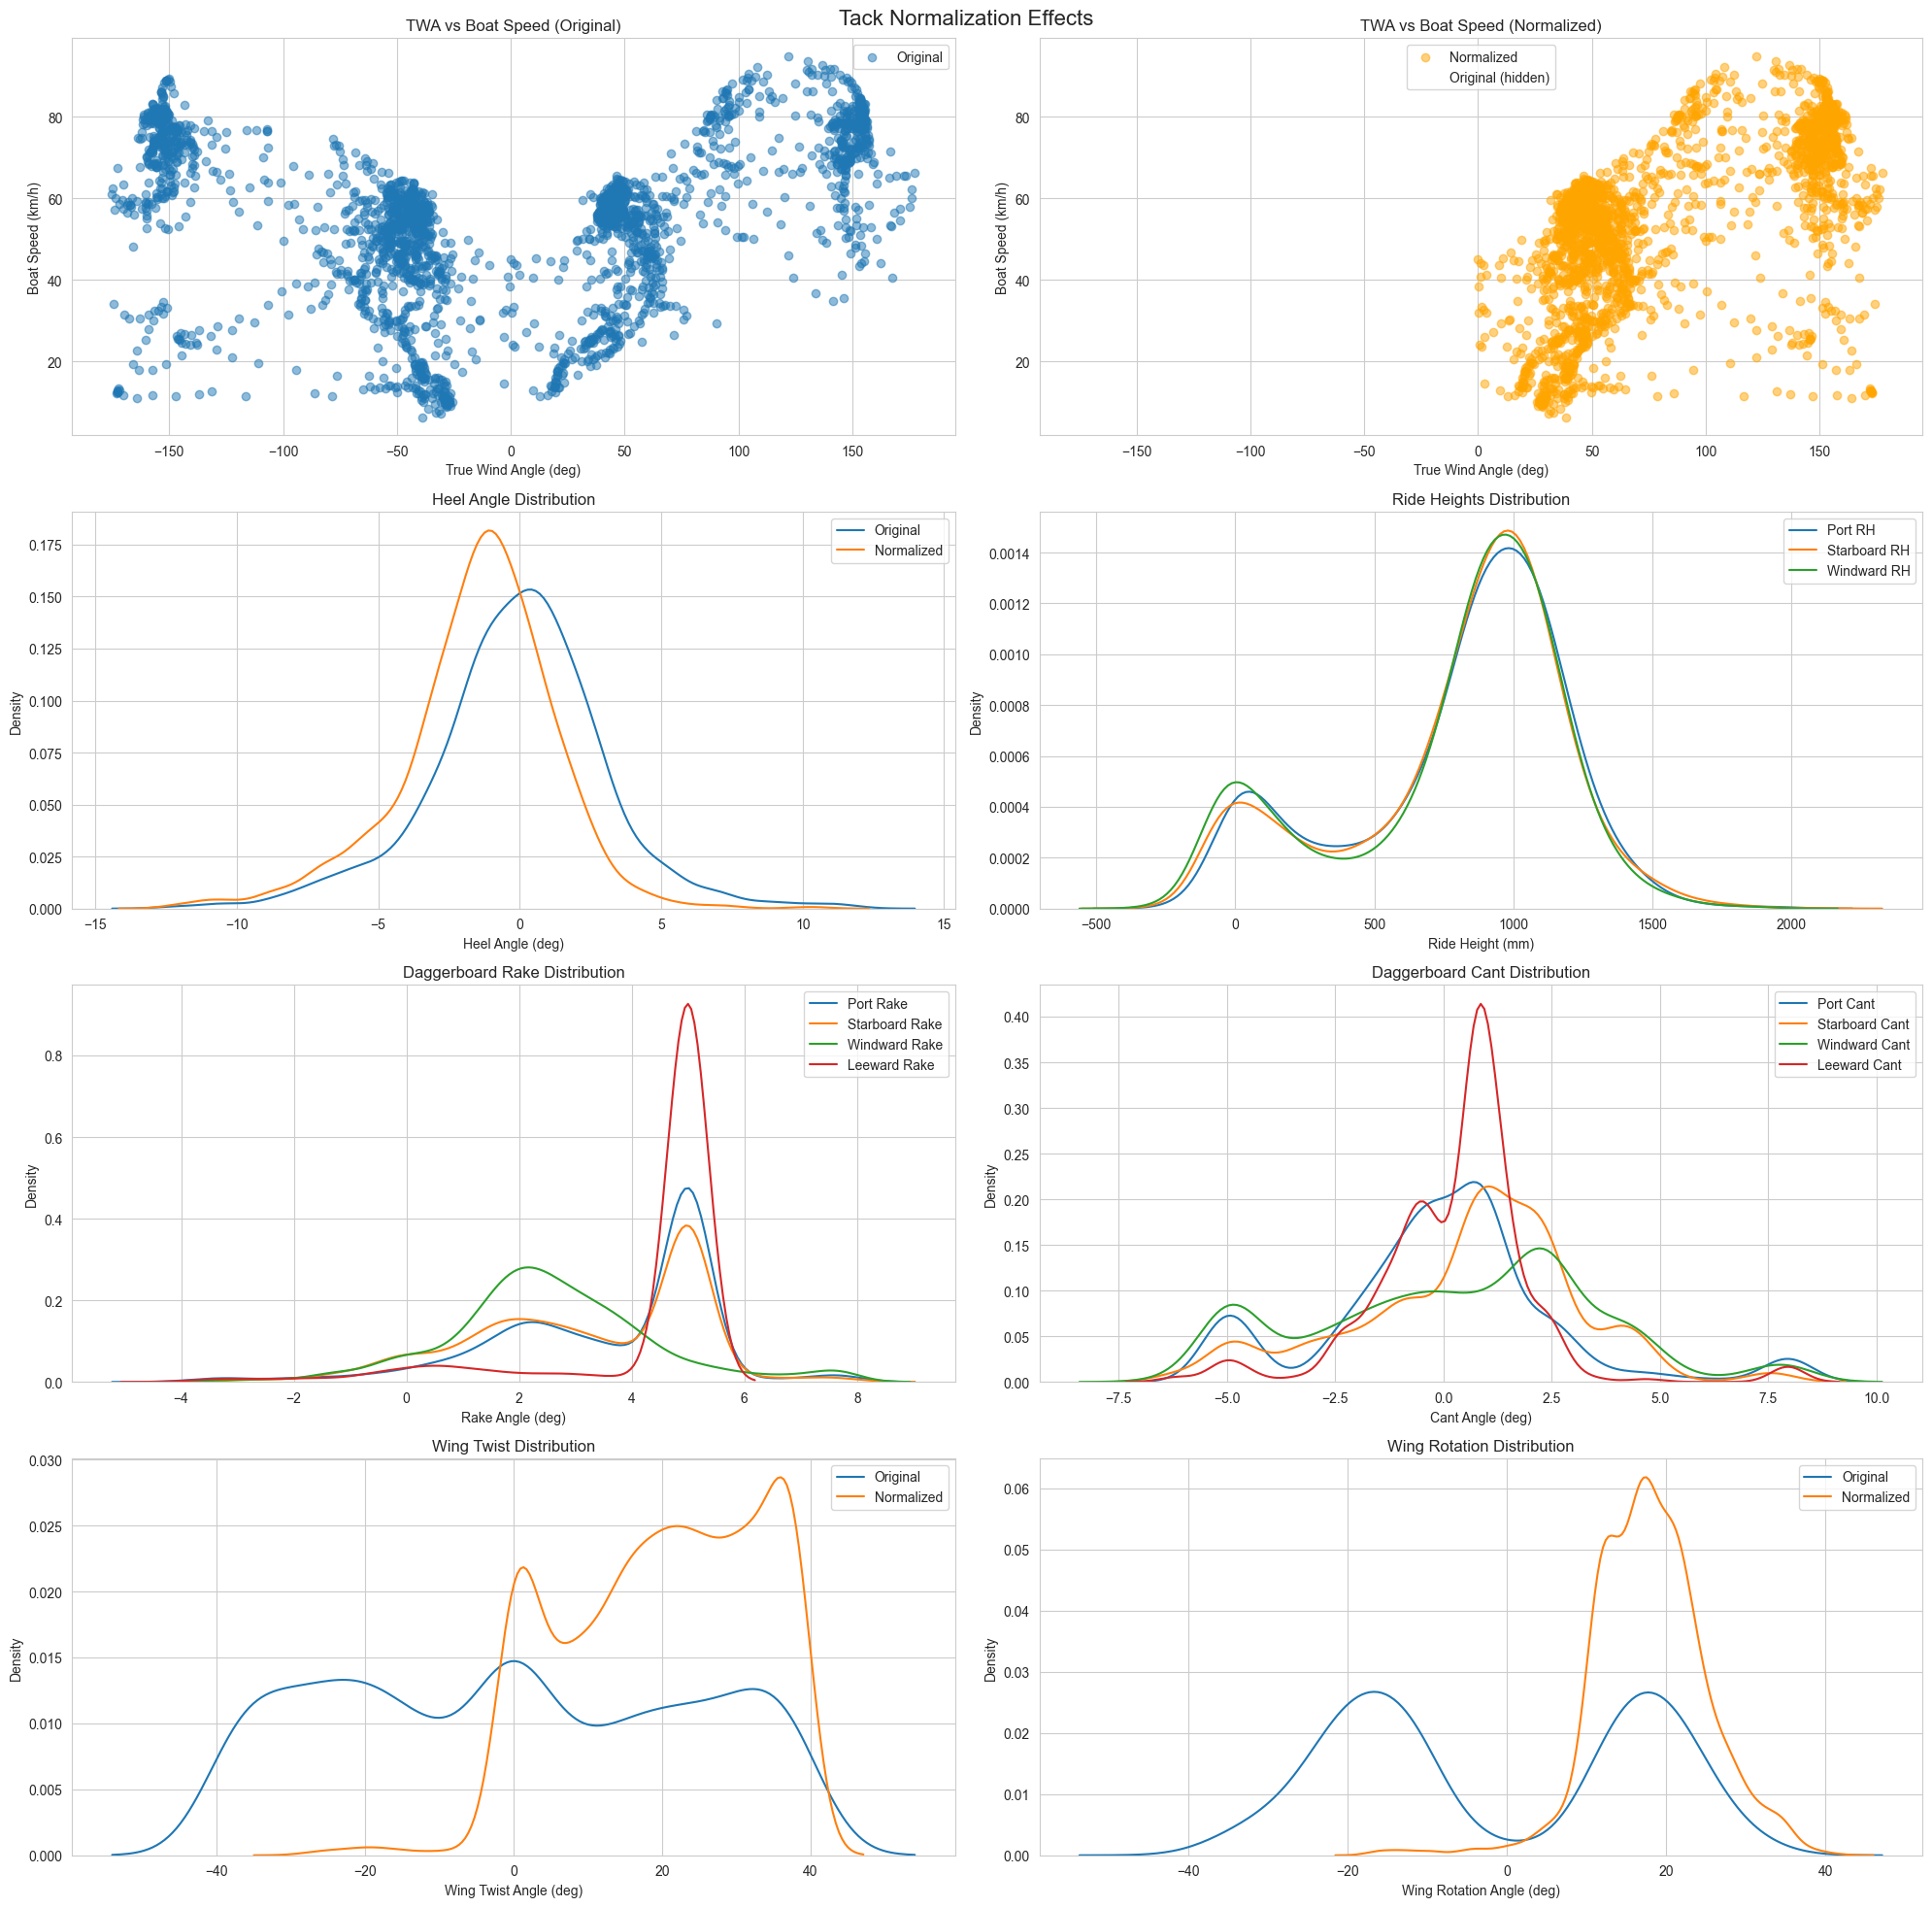

In [10]:
from src.transformations.tack_transformations import normalize_to_starboard_tack
from src.importer import import_boat_log


boat_df = import_boat_log("Data/Boat_Logs/data_AUS.csv")
tacked_df = normalize_to_starboard_tack(boat_df)


fig, axes = plt.subplots(4, 2, figsize=(20, 20))
fig.suptitle("Tack Normalization Effects", fontsize=16)

# 1. TWA vs Boat Speed - Original vs Normalized
axes[0, 0].scatter(
    boat_df["TWA_SGP_deg"], boat_df["BOAT_SPEED_km_h_1"], alpha=0.5, label="Original"
)

axes[0, 0].set_xlabel("True Wind Angle (deg)")
axes[0, 0].set_ylabel("Boat Speed (km/h)")
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].set_title("TWA vs Boat Speed (Original)")

# 2. TWA vs Boat Speed - Normalized
axes[0, 1].scatter(
    tacked_df["TWA_TACKED_deg"],
    tacked_df["BOAT_SPEED_km_h_1"],
    alpha=0.5,
    label="Normalized",
    color="orange",
)
axes[0, 1].scatter(
    boat_df["TWA_SGP_deg"],
    boat_df["BOAT_SPEED_km_h_1"],
    alpha=0.0,
    label="Original (hidden)",
)

axes[0, 1].set_xlabel("True Wind Angle (deg)")
axes[0, 1].set_ylabel("Boat Speed (km/h)")
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[0, 1].set_title("TWA vs Boat Speed (Normalized)")


# 3. Heel Angle Distribution
sns.kdeplot(data=boat_df, x="HEEL_deg", ax=axes[1, 0], label="Original")
sns.kdeplot(data=tacked_df, x="HEEL_TACKED_deg", ax=axes[1, 0], label="Normalized")
axes[1, 0].set_xlabel("Heel Angle (deg)")
axes[1, 0].set_title("Heel Angle Distribution")
axes[1, 0].grid(True)
axes[1, 0].legend()

# 4. Ride Heights Comparison
sns.kdeplot(data=boat_df, x="LENGTH_RH_P_mm", ax=axes[1, 1], label="Port RH")
sns.kdeplot(data=boat_df, x="LENGTH_RH_S_mm", ax=axes[1, 1], label="Starboard RH")
sns.kdeplot(
    data=tacked_df, x="LENGTH_RH_WINDWARD_mm", ax=axes[1, 1], label="Windward RH"
)
axes[1, 1].set_xlabel("Ride Height (mm)")
axes[1, 1].set_ylabel("Density")
axes[1, 1].legend()
axes[1, 1].grid(True)
axes[1, 1].set_title("Ride Heights Distribution")

# 5. Daggerboard Rake Angles
sns.kdeplot(data=boat_df, x="ANGLE_DB_RAKE_P_deg", ax=axes[2, 0], label="Port Rake")
sns.kdeplot(
    data=boat_df, x="ANGLE_DB_RAKE_S_deg", ax=axes[2, 0], label="Starboard Rake"
)
sns.kdeplot(
    data=tacked_df, x="ANGLE_DB_RAKE_WINDWARD_deg", ax=axes[2, 0], label="Windward Rake"
)
sns.kdeplot(
    data=tacked_df, x="ANGLE_DB_RAKE_LEEWARD_deg", ax=axes[2, 0], label="Leeward Rake"
)
axes[2, 0].set_xlabel("Rake Angle (deg)")
axes[2, 0].set_ylabel("Density")
axes[2, 0].legend()
axes[2, 0].grid(True)
axes[2, 0].set_title("Daggerboard Rake Distribution")

# 6. Daggerboard Cant Angles
sns.kdeplot(data=boat_df, x="ANGLE_DB_CANT_P_deg", ax=axes[2, 1], label="Port Cant")
sns.kdeplot(
    data=boat_df, x="ANGLE_DB_CANT_S_deg", ax=axes[2, 1], label="Starboard Cant"
)
sns.kdeplot(
    data=tacked_df, x="ANGLE_DB_CANT_WINDWARD_deg", ax=axes[2, 1], label="Windward Cant"
)
sns.kdeplot(
    data=tacked_df, x="ANGLE_DB_CANT_LEEWARD_deg", ax=axes[2, 1], label="Leeward Cant"
)
axes[2, 1].set_xlabel("Cant Angle (deg)")
axes[2, 1].set_ylabel("Density")
axes[2, 1].legend()
axes[2, 1].grid(True)
axes[2, 1].set_title("Daggerboard Cant Distribution")

# 7. Wing Twist
sns.kdeplot(data=boat_df, x="ANGLE_WING_TWIST_deg", ax=axes[3, 0], label="Original")
sns.kdeplot(
    data=tacked_df, x="ANGLE_WING_TWIST_TACKED_deg", ax=axes[3, 0], label="Normalized"
)
axes[3, 0].set_xlabel("Wing Twist Angle (deg)")
axes[3, 0].set_ylabel("Density")
axes[3, 0].legend()
axes[3, 0].grid(True)
axes[3, 0].set_title("Wing Twist Distribution")

# 8. Wing Rotation
sns.kdeplot(data=boat_df, x="ANGLE_WING_ROT_deg", ax=axes[3, 1], label="Original")
sns.kdeplot(
    data=tacked_df, x="ANGLE_WING_ROT_TACKED_deg", ax=axes[3, 1], label="Normalized"
)
axes[3, 1].set_xlabel("Wing Rotation Angle (deg)")
axes[3, 1].set_ylabel("Density")
axes[3, 1].legend()
axes[3, 1].grid(True)
axes[3, 1].set_title("Wing Rotation Distribution")

plt.tight_layout()
plt.show()
plt.close()

## Question 7: ✅
Given a set of tacks (in CSV), and train a model to explain the key features of these tacks when optimizing for vmg. Show appropriate visualisations to explain your conclusions.

### Remarks:
My conclusion can be found at Question 8. 


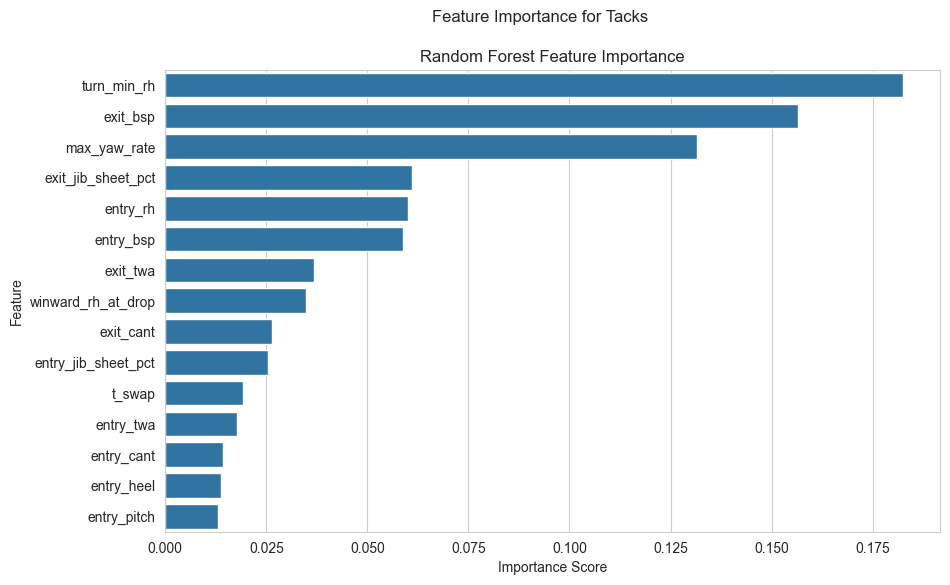

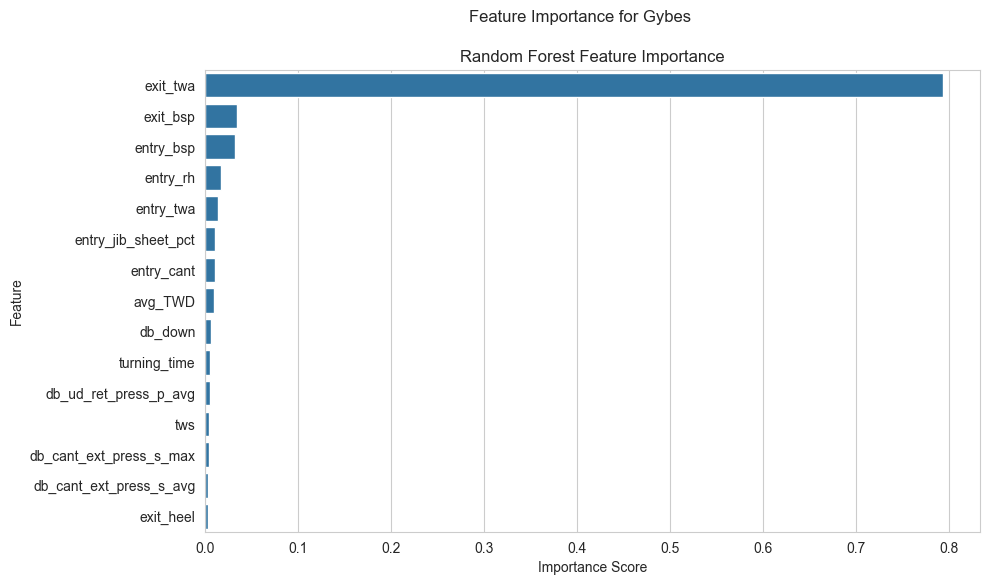

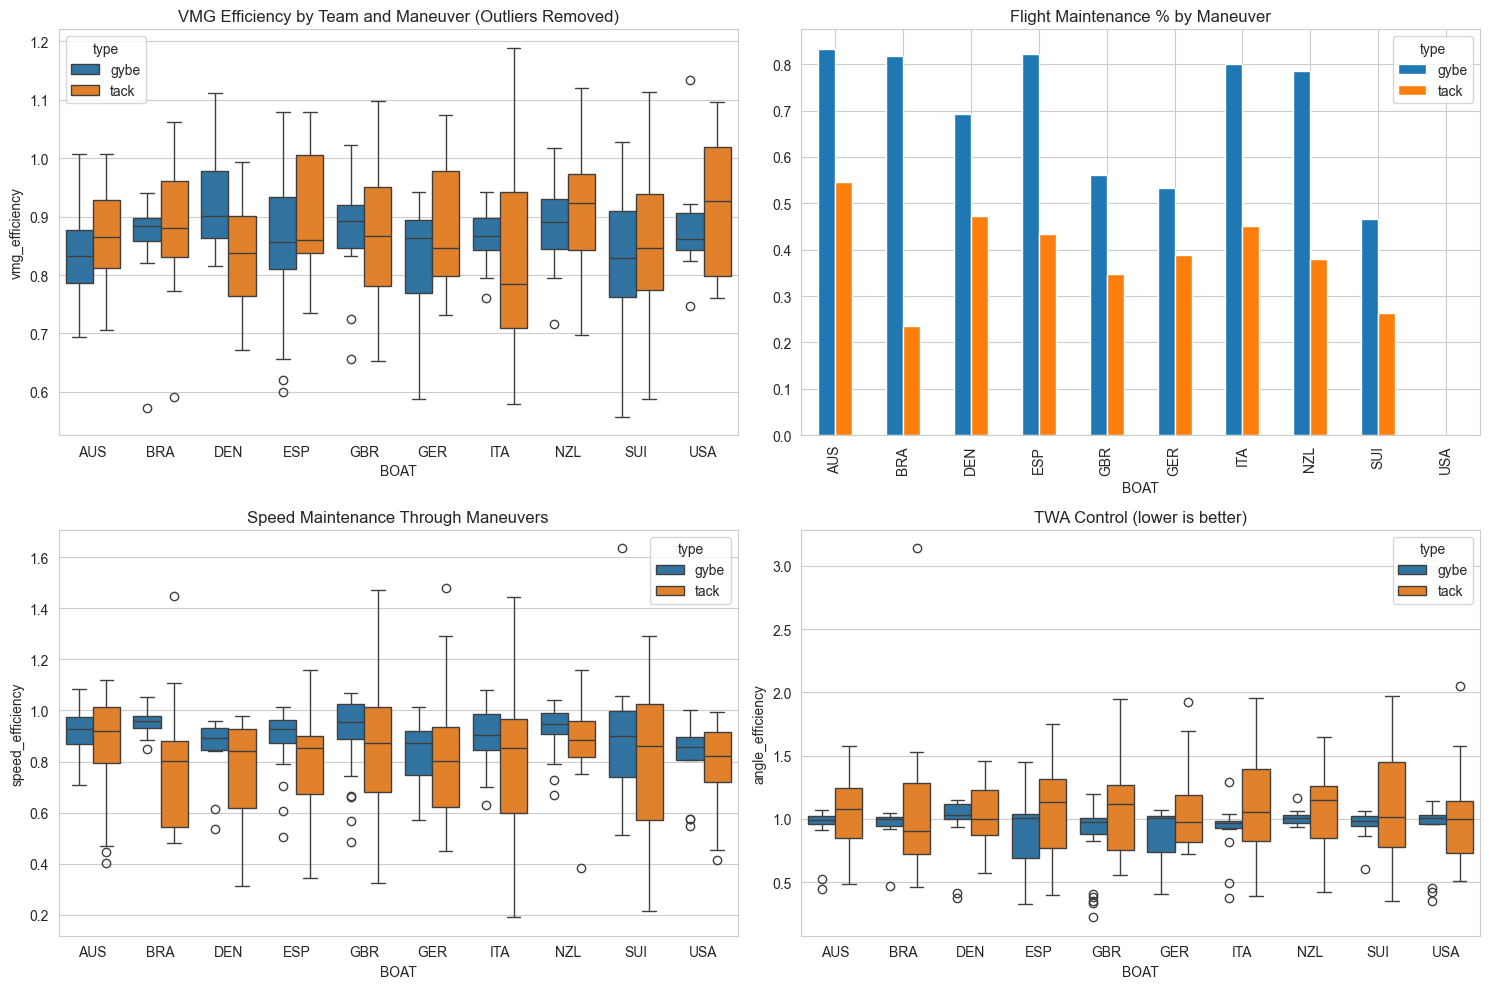

In [11]:
from src.importer import import_maneuver_summary
from src.transformations.maneuver_processor import ManeuverProcessor
from src.analysis.feature_importance import FeatureImportanceAnalyzer
import pandas as pd

df = import_maneuver_summary("Data/2025-01-19_man_summary.csv")

# Initialize processor and analyzer
processor = ManeuverProcessor()
analyzer = FeatureImportanceAnalyzer(processor)

# Analyze tacks and gybes separately
tacks_df = df[df["type"] == "tack"]
gybes_df = df[df["type"] == "gybe"]

# Fit and analyze tacks
analyzer.fit(tacks_df)
tacks_features = analyzer.plot_feature_importance(top_n=15)
plt.suptitle("Feature Importance for Tacks")

# Fit and analyze gybes
analyzer.fit(gybes_df)
gybes_features = analyzer.plot_feature_importance(top_n=15)
plt.suptitle("Feature Importance for Gybes")

metrics = {
    "vmg_efficiency": df["vmg_distance"] / df["theoretical_distance"],
    "flight_maintenance": df["flying"],
    "speed_efficiency": (df["exit_bsp"] / df["entry_bsp"]),
    "angle_efficiency": df["exit_twa"] / df["entry_twa"],
}

df = pd.merge(df, pd.DataFrame(metrics), left_index=True, right_index=True)


def visualize_performance(df):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # VMG Efficiency by Boat and Maneuver Type
    # Remove outliers using IQR method
    Q1 = df["vmg_efficiency"].quantile(0.25)
    Q3 = df["vmg_efficiency"].quantile(0.75)
    IQR = Q3 - Q1
    df_filtered = df[
        ~(
            (df["vmg_efficiency"] < (Q1 - 1.5 * IQR))
            | (df["vmg_efficiency"] > (Q3 + 1.5 * IQR))
        )
    ]

    sns.boxplot(
        data=df_filtered, x="BOAT", y="vmg_efficiency", hue="type", ax=axes[0, 0]
    )
    axes[0, 0].set_title("VMG Efficiency by Team and Maneuver (Outliers Removed)")

    # Flight Maintenance by Maneuver Type
    flight_stats = df.groupby(["BOAT", "type"])["flying"].mean().unstack()
    flight_stats.plot(kind="bar", ax=axes[0, 1])
    axes[0, 1].set_title("Flight Maintenance % by Maneuver")

    # Speed Loss in Maneuvers
    sns.boxplot(data=df, x="BOAT", y="speed_efficiency", hue="type", ax=axes[1, 0])
    axes[1, 0].set_title("Speed Maintenance Through Maneuvers")

    sns.boxplot(data=df, x="BOAT", y="angle_efficiency", hue="type", ax=axes[1, 1])
    axes[1, 1].set_title("TWA Control (lower is better)")

    plt.tight_layout()
    return fig


performance = visualize_performance(df)

plt.show()
plt.close()

## Question 8: 
Give insights on the racing on what made a team win or underperform in the race.


#### Gybing
Looking at feature importance on what makes good `vmg_distance` when gybing we can see that for all algorithms `exit_twa` plays an outsized role. 
Which is understandable as with a good gybe boats lose the least amount of speed during the maneuver which results in more flight time. 
Comparing AUS against SUI here we can also see that SUI struggled to keep the speed during gybes and fell off the foils more than once. Whereas AUS was able to keep their speed relatively steady which also meant being able to have more flight time. This allows them to cover more distance. Looking into GBR as well they were able to nail their gybes on the lower end almost always performing at `theoretical_vmg` or better.

#### Tacking
This race was particularly windy, so most boats had a better `vmg_distance` than predicted also the new T-Foils came into play. Which may make the `theoretical_vmg` outdated. 
As we can see the `turn_min_rh` e.g. "Turn Minimum Ride Height" plays a significant role in determining the execution of the tack. Which likely comes due to many teams falling off the foils trying to control the boat. Also here AUS demonstrates their ability to keep the boat flying turning through the wind, which also shows in their consistency in maintaining speed through the maneuver. 

In general I think races are won with the most flight time combined with well executed maneuvers and of course a good course selection. 
We can see here that generally AUS, NZL, ESP have overall good control and tightness over their execution. 
